In [ ]:
!pip install -qU ragas datasets openai langchain langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 506.8/506.8 kB 21.1 MB/s eta 0:00:00


In [ ]:
from datasets import Dataset
from ragas import evaluate
from ragas.metrics import answer_relevancy, faithfulness, context_precision, context_recall
from langchain_openai import ChatOpenAI


In [ ]:
import os
os.environ["OPENAI_API_KEY"] = "API_KEY_HERE"   # Paste your key here


In [ ]:
data = {
    "question": [
        "What is LangChain?",
        "Who developed ChromaDB?"
    ],
    "answer": [
        "LangChain is a framework for developing applications powered by language models.",
        "ChromaDB was developed by Chroma, an open-source embedding database company."
    ],
    "contexts": [
        [
            "LangChain is an open-source framework for developing LLM applications.",
            "It helps in chaining LLMs with external data and APIs."
        ],
        [
            "ChromaDB is a vector database developed by Chroma.",
            "It stores and queries embeddings efficiently for retrieval-augmented generation."
        ]
    ],
    "ground_truth": [
        "LangChain is an open-source framework for building applications using large language models.",
        "ChromaDB was built by the Chroma team as an open-source vector database."
    ]
}

from datasets import Dataset
dataset = Dataset.from_dict(data)


In [ ]:
llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0.5)


In [ ]:
from ragas import evaluate
from ragas.metrics import answer_relevancy, faithfulness, context_precision, context_recall

results = evaluate(
    dataset=dataset,
    metrics=[answer_relevancy, faithfulness, context_precision, context_recall],
    llm=llm
)


Evaluating:   0%|          | 0/8 [00:00<?, ?it/s]

In [ ]:
print("\n=== RAGAS Evaluation Results ===")
print(results)

df = results.to_pandas()
print("\nDetailed Metric Breakdown:\n", df)


=== RAGAS Evaluation Results ===
{'answer_relevancy': 0.9793, 'faithfulness': 0.7500, 'context_precision': 1.0000, 'context_recall': 1.0000}

Detailed Metric Breakdown:
                 user_input                                 retrieved_contexts  \
0       What is LangChain?  [LangChain is an open-source framework for dev...   
1  Who developed ChromaDB?  [ChromaDB is a vector database developed by Ch...   

                                            response  \
0  LangChain is a framework for developing applic...   
1  ChromaDB was developed by Chroma, an open-sour...   

                                           reference  answer_relevancy  \
0  LangChain is an open-source framework for buil...          0.958507   
1  ChromaDB was built by the Chroma team as an op...          1.000000   

   faithfulness  context_precision  context_recall  
0           1.0                1.0             1.0  
1           0.5                1.0             1.0  


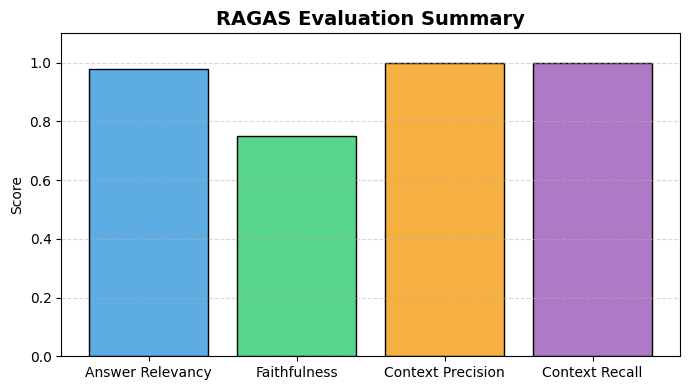

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Compute mean of each metric ---
metrics = {
    "Answer Relevancy": np.nanmean(results["answer_relevancy"]),
    "Faithfulness": np.nanmean(results["faithfulness"]),
    "Context Precision": np.nanmean(results["context_precision"]),
    "Context Recall": np.nanmean(results["context_recall"])
}

# --- Plot ---
plt.figure(figsize=(7, 4))
plt.bar(metrics.keys(), metrics.values(),
        color=["#5DADE2", "#58D68D", "#F5B041", "#AF7AC5"],
        edgecolor='black')
plt.title("RAGAS Evaluation Summary", fontsize=14, fontweight='bold')
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


/tmp/ipython-input-228225627.py:20: UserWarning: Glyph 128376 (\N{SPIDER WEB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128376 (\N{SPIDER WEB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


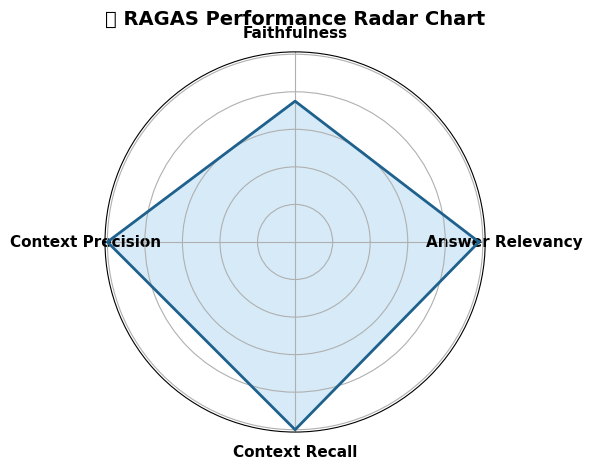

In [ ]:
import numpy as np
from math import pi

# --- Radar Chart Setup ---
labels = list(metrics.keys())
values = list(metrics.values())
values += values[:1]  # repeat first to close circle

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

ax.fill(angles, values, color="#5DADE2", alpha=0.25)
ax.plot(angles, values, color="#1F618D", linewidth=2)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=11, fontweight='bold')
ax.set_title("🕸️ RAGAS Performance Radar Chart", size=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()
